<a href="https://colab.research.google.com/github/pvrancx/torch_isr/blob/master/colabs/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone "https://github.com/pvrancx/torch_isr.git"
% cd /content/torch_isr
! git pull

fatal: destination path 'torch_isr' already exists and is not an empty directory.
/content/torch_isr
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/pvrancx/torch_isr
   c50fdf7..0abbbd7  master     -> origin/master
Updating c50fdf7..0abbbd7
Fast-forward
 isr/datasets/transforms.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
from torchvision.transforms import transforms

from isr.datasets.bsd import load_bsd300
from isr.datasets.isr import IsrDataset
from isr.datasets.transforms import ChannelSelect

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def show_img(img, ax):  
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if img.getbands() == ('L',):
    ax.imshow(img, cmap='gray')
  else:
    ax.imshow(img)

def show(img, label):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
  show_img(img, ax1)
  show_img(label, ax2)


Download and load bsd300 dataset

In [4]:
bsd = load_bsd300('data/')

Using downloaded and verified file: data/BSDS300-images.tgz


Default: source and target images are identical

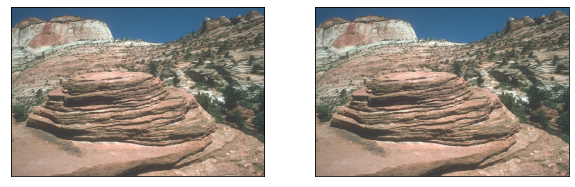

In [5]:
show(*bsd[-1])

Transform source image to grayscale for colorisation data set.

In [6]:
bsd_gs = load_bsd300('data/', transform=transforms.Grayscale())

Using downloaded and verified file: data/BSDS300-images.tgz


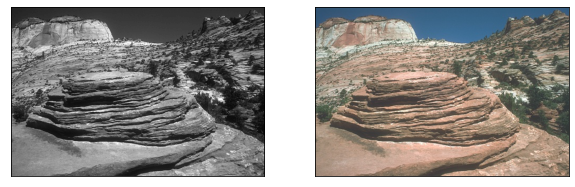

In [7]:
show(*bsd_gs[-1])

Use IsrDataset wrapper to get super resolution dataset. Source image is downscaled low resolution image, target is full resolution image crop (output_size x output_size).

In [0]:
bsd_isr = IsrDataset(bsd, output_size=200, scale_factor=4)

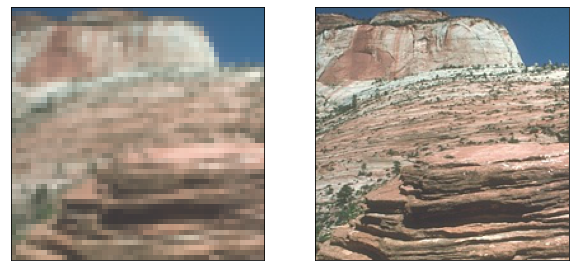

In [9]:
show(*bsd_isr[-1])

Default behaviour is to take random crop.

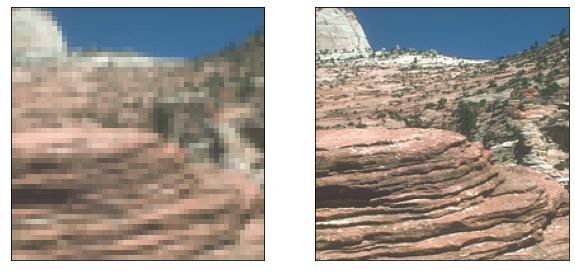

In [10]:
show(*bsd_isr[-1])

Use deterministic flag to always use the same centered crop.

In [0]:
bsd_isr_d = IsrDataset(bsd, output_size=200, scale_factor=4, deterministic=True)

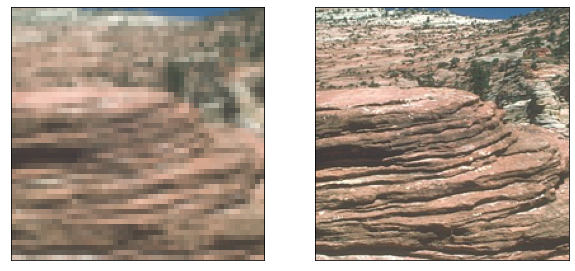

In [12]:
show(*bsd_isr_d[-1])

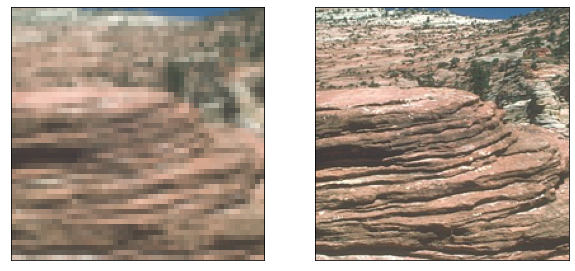

In [13]:
show(*bsd_isr_d[-1])

Use base_image_transform to apply identical transforms to source and target for data augmentation.

In [0]:
img_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
    ])
bsd_aug = IsrDataset(bsd, output_size=200, scale_factor=4, base_image_transform=img_transforms)

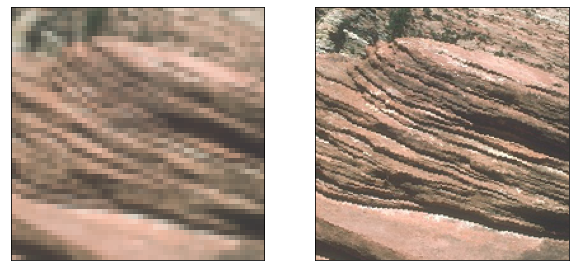

In [15]:
show(*bsd_aug[-1])

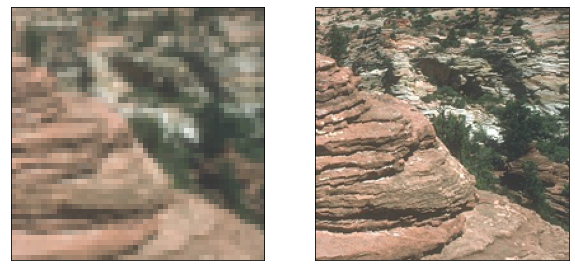

In [16]:
show(*bsd_aug[-1])

ISR dataset using only luminocity channel.

In [17]:
bsd_YCbCr = load_bsd300('data/', image_mode='YCbCr')
bsd_lum = IsrDataset(bsd_YCbCr, output_size=200, scale_factor=4, base_image_transform=ChannelSelect(0))

Using downloaded and verified file: data/BSDS300-images.tgz


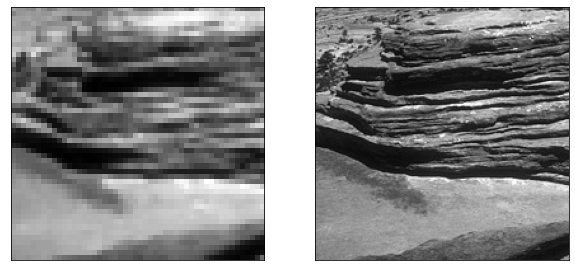

In [18]:
show(*bsd_lum[-1])